In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import pymysql

In [2]:
timeout = 10
connection = pymysql.connect(
      charset="utf8mb4",
      connect_timeout=timeout,
      cursorclass=pymysql.cursors.DictCursor,
      db="WEATHER-AIR-POLLUTION",
      host="mysql-3cafd5ec-weather-air-pollution.e.aivencloud.com",
      password="***********************",
      read_timeout=timeout,
      port=24379,
      user="avnadmin",
      write_timeout=timeout
)

In [3]:
cur = connection.cursor()
cur.execute("""SELECT * FROM Weather_Air_Cleaned""")
df = pd.DataFrame(cur.fetchall())
df["date_time"] = pd.to_datetime(df["date_time"])
df

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co
0,2020-01-01,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.0000,8.0,4.0,2.0
1,2020-01-02,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.0000,9.0,4.0,4.0
2,2020-01-03,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.0000,17.0,4.0,10.0
3,2020-01-04,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.0000,23.0,4.0,11.0
4,2020-01-05,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.0000,20.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-09-19,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.0245,19.0,38.0,3.0
1724,2024-09-20,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.0453,19.0,39.0,3.0
1725,2024-09-21,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.0227,19.0,39.0,3.0
1726,2024-09-22,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.0227,19.0,37.0,3.0


In [4]:
df["month"] = df["date_time"].dt.month
def get_season(month):
    _sea = {12: "Winter", 1: "Winter", 2: "Winter",
            3: "Spring", 4: "Spring", 5: "Spring",
            6: "Summer", 7: "Summer", 8: "Summer",
            9: "Autumn", 10: "Autumn", 11: "Autumn"}
    return _sea.get(month)
df["season"] = df["month"].map(get_season)
df

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co,month,season
0,2020-01-01,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.0000,8.0,4.0,2.0,1,Winter
1,2020-01-02,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.0000,9.0,4.0,4.0,1,Winter
2,2020-01-03,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.0000,17.0,4.0,10.0,1,Winter
3,2020-01-04,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.0000,23.0,4.0,11.0,1,Winter
4,2020-01-05,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.0000,20.0,4.0,8.0,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-09-19,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.0245,19.0,38.0,3.0,9,Autumn
1724,2024-09-20,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.0453,19.0,39.0,3.0,9,Autumn
1725,2024-09-21,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.0227,19.0,39.0,3.0,9,Autumn
1726,2024-09-22,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.0227,19.0,37.0,3.0,9,Autumn


In [5]:
spring = df.loc[df["season"] == "Spring", "pm2_5"]
summer = df.loc[df["season"] == "Summer", "pm2_5"]
autumn = df.loc[df["season"] == "Autumn", "pm2_5"]
winter = df.loc[df["season"] == "Winter", "pm2_5"]

val = stats.f_oneway(spring, summer, autumn, winter)
print(val)

F_onewayResult(statistic=103.06430993441188, pvalue=2.2803073958601473e-61)


In [6]:
df['is_winter'] = (df['season'] == 'Winter').astype(int)
df['is_spring'] = (df['season'] == 'Spring').astype(int)
df['is_summer'] = (df['season'] == 'Summer').astype(int)
df['is_autumn'] = (df['season'] == 'Autumn').astype(int)
df

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co,month,season,is_winter,is_spring,is_summer,is_autumn
0,2020-01-01,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.0000,8.0,4.0,2.0,1,Winter,1,0,0,0
1,2020-01-02,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.0000,9.0,4.0,4.0,1,Winter,1,0,0,0
2,2020-01-03,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.0000,17.0,4.0,10.0,1,Winter,1,0,0,0
3,2020-01-04,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.0000,23.0,4.0,11.0,1,Winter,1,0,0,0
4,2020-01-05,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.0000,20.0,4.0,8.0,1,Winter,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-09-19,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.0245,19.0,38.0,3.0,9,Autumn,0,0,0,1
1724,2024-09-20,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.0453,19.0,39.0,3.0,9,Autumn,0,0,0,1
1725,2024-09-21,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.0227,19.0,39.0,3.0,9,Autumn,0,0,0,1
1726,2024-09-22,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.0227,19.0,37.0,3.0,9,Autumn,0,0,0,1


In [7]:
df.drop(columns=["date_time", "month", "season"], inplace=True)
df

,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co,is_winter,is_spring,is_summer,is_autumn
0,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.0000,8.0,4.0,2.0,1,0,0,0
1,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.0000,9.0,4.0,4.0,1,0,0,0
2,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.0000,17.0,4.0,10.0,1,0,0,0
3,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.0000,23.0,4.0,11.0,1,0,0,0
4,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.0000,20.0,4.0,8.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.0245,19.0,38.0,3.0,0,0,0,1
1724,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.0453,19.0,39.0,3.0,0,0,0,1
1725,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.0227,19.0,39.0,3.0,0,0,0,1
1726,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.0227,19.0,37.0,3.0,0,0,0,1


In [8]:
from sklearn.model_selection import train_test_split
target = "pm2_5"
x = df.drop(columns=[target])
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

y_predict = reg.predict(x_test)

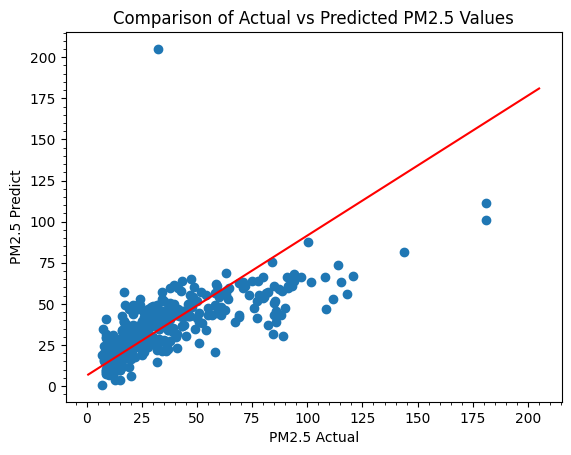

In [11]:
plt.scatter(y_test, y_predict)
plt.plot([min(y_predict), max(y_predict)], [min(y_test), max(y_test)], color="red")
plt.xlabel('PM2.5 Actual')
plt.ylabel('PM2.5 Predict')
plt.title("Comparison of Actual vs Predicted PM2.5 Values")
plt.minorticks_on()
plt.show()

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

MAE: 13.653693702325748
MSE: 426.2273124293674
R2: 0.47433447723248745


In [13]:
cur.close()
connection.close()